In [2]:
from tools import *
%matplotlib notebook
import pandas as pd
from copy import deepcopy
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle

data = pd.read_csv('K2_all_PS1_psc_ev_crowding_sdss.csv')
calsources = pd.read_csv('../calibration/calspec_full.csv')

In [4]:
data

,ID,campaign,Kpmag,RAJ2000,DecJ2000,objID,ps_score,raMean,decMean,raMeanErr,...,ps1g_synSDSS,ps1g_synSDSS_norm,ps1r_synSDSS,ps1r_synSDSS_norm,ps1i_synSDSS,ps1i_synSDSS_norm,ps1z_synSDSS,ps1z_synSDSS_norm,ps1y_synSDSS,ps1y_synSDSS_norm
0,240256177,11,15.209,264.202808,-29.983788,72012642029659459,0.835958,264.203038,-29.984112,0.00844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,235602262,11,14.614,258.183370,-29.922976,72092581833652554,0.944292,258.183390,-29.923136,0.01128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,231475918,11,15.325,257.097258,-29.912254,72102570972375576,0.876125,257.097224,-29.912255,0.00389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240276746,11,15.316,265.249601,-29.914643,72102652496092704,0.980667,265.249599,-29.914656,0.00578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,213305199,7,16.606,285.916016,-29.912827,72102859161154729,0.986667,285.916132,-29.913036,0.00679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104199,202067461,0,14.800,100.590550,28.809440,142571005905561922,0.997500,100.590554,28.809457,0.00731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104200,202066738,0,14.600,101.028900,28.868520,142641010288792817,0.995208,101.028904,28.868524,0.00457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104201,202085664,0,15.900,101.397410,28.888150,142661013974826192,0.966280,101.397416,28.887992,0.00289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104202,202067114,0,14.400,100.956330,28.919800,142701009562734305,0.983958,100.956319,28.919805,0.01055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
c1 = SkyCoord(data['RAJ2000'].values, data['DecJ2000'].values, frame='icrs', unit='deg')[:100]
catalog = "I/347/gaia2dis"
catalog = "I/345/gaia2"

result = Vizier.query_region(c1, catalog=[catalog],radius=Angle(5, "arcsec"))
no_targets_found_message = ValueError('Either no sources were found in the query region '
                                      'or Vizier is unavailable')

if result is None:
    raise no_targets_found_message
elif len(result) == 0:
    raise no_targets_found_message
result = result[catalog].to_pandas()

In [45]:
coord = SkyCoord(ra=data['RAJ2000'].values, dec=data['DecJ2000'].values, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(2,u.arcsec)

In [46]:
from astroquery.gaia import Gaia

In [47]:
j = Gaia.cone_search_async(coord[0], radius)
r = j.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [48]:
a = r.to_pandas()

In [49]:
a

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 4058497533635457408',4058497533635457408,631979957,2015.5,264.203008,1.747905,-29.983801,1.278237,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.000167
1,1635721458409799680,b'Gaia DR2 4058497529240543488',4058497529240543488,1024018720,2015.5,264.203062,0.722324,-29.984135,0.633589,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.000412


In [50]:
r

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object,float64
1635721458409799680,Gaia DR2 4058497533635457408,4058497533635457408,631979957,2015.5,264.2030083660582,1.747904591542022,-29.983800639239075,1.278236864429682,--,--,--,--,--,--,--,0.22717126,--,--,--,--,--,--,--,--,--,90,0,89,1,10.609869,308.62695,6.596838202577029,12.452737482836683,3,False,0.0123890545,--,--,0.2257587,10,7,6.6860757,0,11,False,90,123.46029973629467,1.7801617147232551,69.35342,20.459547,0,--,--,--,--,0,--,--,--,--,--,1,--,--,--,--,--,0,--,--,--,NOT_AVAILABLE,358.09653429506943,1.0725533458758225,264.9469533563287,-6.646145793642441,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+4058497533635457408,,0.00016746243095141854
1635721458409799680,Gaia DR2 4058497529240543488,4058497529240543488,1024018720,2015.5,264.20306222010413,0.7223238569452636,-29.984135245490968,0.6335885059597224,--,--,--,--,--,--,--,0.92081755,--,--,--,--,--,--,--,--,--,90,0,83,7,15.374497,468.5104,1.2875725535743852,35.02109795945116,3,False,0.51403826,--,--,0.5338812,10,6,3.025415,0,11,False,84,4069.2214300974824,9.281222708989057,438.4359,16.664587,9,1873.1440146571724,22.95081337566454,81.615585,17.16996,10,4003.0277723195377,34.959782277352936,114.5038,15.755948,1.444053,0,1.414012,0.50537

In [86]:
catalog = "I/347/gaia2dis"
c1 = SkyCoord(data['RAJ2000'].values, data['DecJ2000'].values, frame='icrs', unit='deg')
d = []
d_low = []
d_high = []
for i in range(len(c1)):
    result = Vizier.query_region(c1[i], catalog=[catalog],radius=Angle(3, "arcsec"))
    if len(result) != 0:
        #print('beep')
        r = result[catalog].to_pandas()
        #if len(r) > 1:
        r = r.iloc[0]
        d += [r['rest']]
        d_low += [r['b_rest']]
        d_high += [r['B_rest']]
    else:
        d += [np.nan]
        d_low += [np.nan]
        d_high += [np.nan]



In [3]:
cra = calsources.ra.values
cdec = calsources.dec.values
catalog = "I/347/gaia2dis"
c1 = SkyCoord(cra, cdec, frame='icrs', unit='deg')
d = []
d_low = []
d_high = []
for i in range(len(c1)):
    result = Vizier.query_region(c1[i], catalog=[catalog],radius=Angle(3, "arcsec"))
    if len(result) != 0:
        #print('beep')
        r = result[catalog].to_pandas()
        #if len(r) > 1:
        r = r.iloc[0]
        d += [r['rest']]
        d_low += [r['b_rest']]
        d_high += [r['B_rest']]
    else:
        d += [np.nan]
        d_low += [np.nan]
        d_high += [np.nan]



In [4]:
d

[358.606583105468,
 39.7516062433225,
 nan,
 nan,
 1119.29395250583,
 nan,
 1816.44886801553,
 866.196862233268,
 1353.90212481067,
 1336.90542709441,
 977.611435082632,
 1209.07290284685,
 nan,
 nan,
 285.581265980143,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 500.888080661631,
 150.210477004984,
 1948.59474823648,
 54.5167041314462,
 nan,
 102.544368134541,
 266.442276752815,
 226.003037525688,
 52.8455285093331,
 nan,
 51.8850245651238,
 10.4953173522532,
 nan,
 274.305357675156,
 489.653038328318,
 61.595659498696,
 68.2410834221997,
 162.391246511529,
 nan,
 44.5688421314139,
 875.773848116911,
 nan,
 nan,
 1644.96660409831,
 nan,
 nan,
 nan,
 77.1722954573121,
 394.627269814505,
 114.828092514335,
 60.7318700093321,
 119.813723719178,
 nan,
 nan,
 195.5157188864,
 nan,
 73.2771970561903,
 537.631003692052,
 71.5870194114535,
 nan,
 nan,
 nan,
 515.57538519363,
 157.5418673849,
 34.9433307898985,
 nan,
 nan,
 398.949914539084,
 4513.97125807924,
 1313.14806827655,
 60.33633

In [5]:
calsources['gaia_med']= d 
calsources['gaia_low']= d_low
calsources['gaia_high']= d_high 

In [7]:
calsources.to_csv('../calibration/calspec_full.csv',index=False)

In [91]:
dat = deepcopy(data)

In [92]:
dat['gaia_med'] = d
dat['gaia_low'] = d_low
dat['gaia_high'] = d_high

In [95]:
dat.to_csv('K2_all_PS1_psc_ev_crowding_sdss_gaia.csv',index=False)

In [103]:
obs = pd.read_csv('K2_all_PS1_psc_ev_crowding_sdss_gaia_ext.csv')

<IPython.core.display.Javascript object>


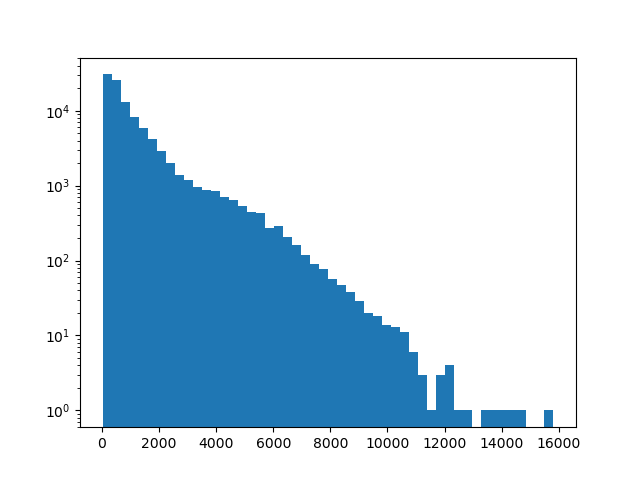

<IPython.core.display.Javascript object>


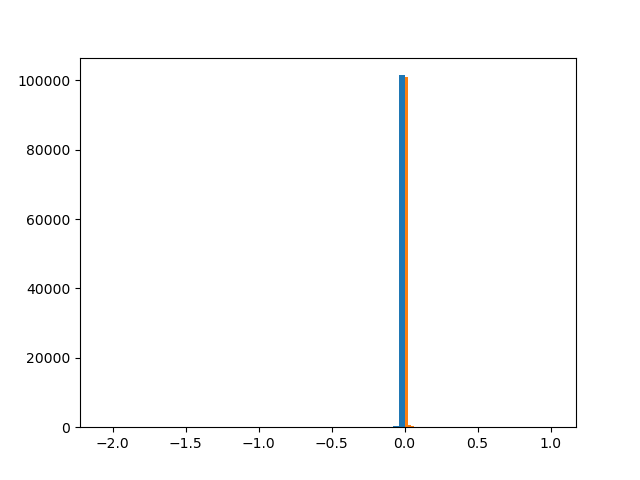

(array([1.00898e+05, 5.59000e+02, 2.44000e+02, 1.35000e+02, 8.20000e+01,
        5.60000e+01, 2.10000e+01, 2.00000e+01, 1.40000e+01, 1.10000e+01,
        7.00000e+00, 7.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00,
        3.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.0204    , 0.0408    , 0.06119999, 0.08159999,
        0.10199999, 0.12239999, 0.14279999, 0.16319998, 0.18359998,
        0.20399998, 0.22439998, 0.24479998, 0.26519997, 0.28559997,
        0.30599997, 0.32639997, 0.34679997, 0.36719996, 0.387599

In [106]:
plt.figure()
plt.hist(obs['gaia_med'],bins=50)
plt.yscale('log')

plt.figure()
plt.hist(obs['ext_low']-obs['ext_med'],bins=50)
plt.hist(obs['ext_high']-obs['ext_med'],bins=50)


In [64]:
catalog = "I/345/gaia2"
result = Vizier.query_region(c1[10], catalog=[catalog],radius=Angle(3, "arcsec"))
result[catalog].to_pandas()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,...,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
0,257.508617,0.0423,-29.821598,0.0312,6029056188635475200,0.1257,0.0415,-6.359,0.09,-1.751,...,13.7218,0.0017,2.1537,NaN,NaN,3988.86,1.3827,0.695,NaN,NaN
